<a href="https://colab.research.google.com/github/devvashisth07/early-event-detection/blob/main/EED_for_heart_failure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Split the data into features (X) and the target variable (y)
X = data.drop("DEATH_EVENT", axis=1)
y = data["DEATH_EVENT"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train a machine learning model (Random Forest Classifier)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)


Accuracy: 0.75
Confusion Matrix:
[[33  2]
 [13 12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.94      0.81        35
           1       0.86      0.48      0.62        25

    accuracy                           0.75        60
   macro avg       0.79      0.71      0.72        60
weighted avg       0.78      0.75      0.73        60



In [51]:
data.sample(10)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
180,40.0,0,478,1,30,0,303000.00,0.90,136,1,0,148,0
189,40.0,0,244,0,45,1,275000.00,0.90,140,0,0,174,0
199,60.0,0,1211,1,35,0,263358.03,1.80,113,1,1,186,0
83,79.0,1,55,0,50,1,172000.00,1.80,133,1,0,78,0
111,55.0,0,60,0,35,0,228000.00,1.20,135,1,1,90,0
78,75.0,1,203,1,38,1,283000.00,0.60,131,1,1,74,0
17,45.0,0,582,0,14,0,166000.00,0.80,127,1,0,14,1
116,60.0,1,96,1,60,1,271000.00,0.70,136,0,0,94,0
30,94.0,0,582,1,38,1,263358.03,1.83,134,1,0,27,1
15,82.0,1,379,0,50,0,47000.00,1.30,136,1,0,13,1


In [52]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [53]:
fig = px.pie(data, names='DEATH_EVENT', title='Distribution of Death Events in Patients',width=600, height=400)
fig.show()

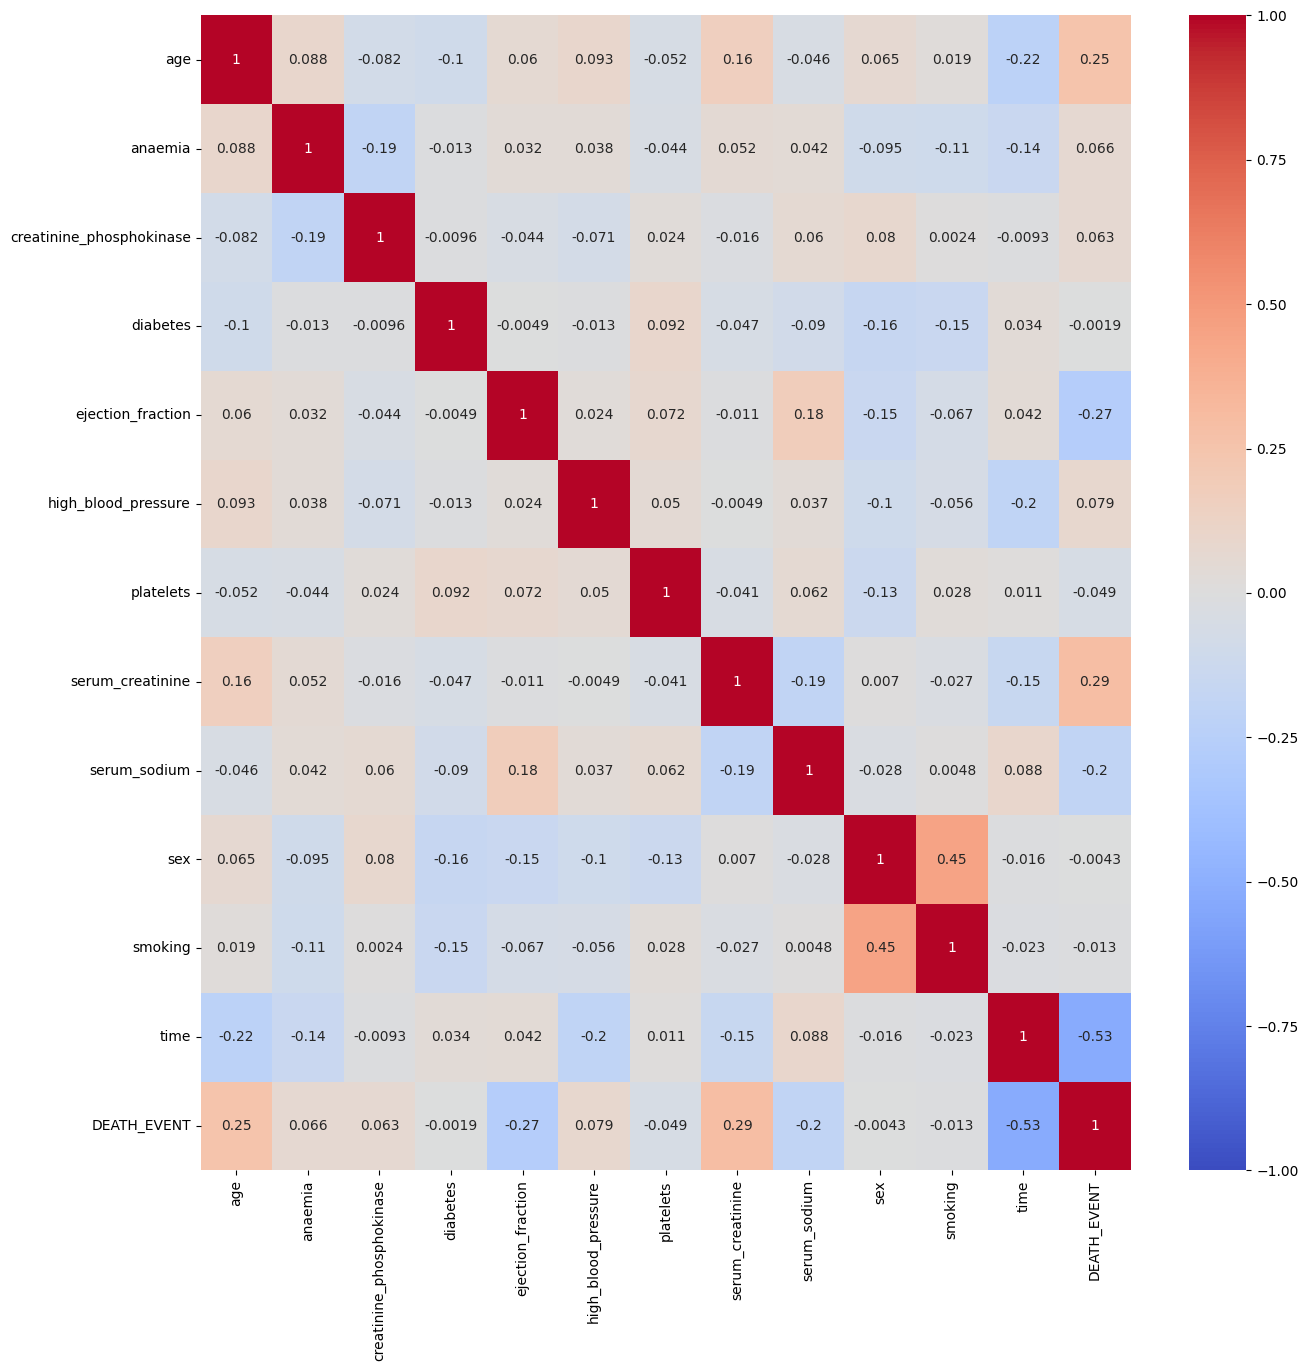

In [54]:
corr = data.corr()
ax, fig = plt.subplots(figsize=(15,15))
sns.heatmap(corr, vmin=-1, cmap='coolwarm', annot=True)
plt.show()

In [55]:
corr[abs(corr['DEATH_EVENT']) > 0.1]['DEATH_EVENT']

age                  0.253729
ejection_fraction   -0.268603
serum_creatinine     0.294278
serum_sodium        -0.195204
time                -0.526964
DEATH_EVENT          1.000000
Name: DEATH_EVENT, dtype: float64

In [56]:
# Model training and prediction
# Trial and Error revealed that not considering Age column improves accuracy

x = data[['ejection_fraction', 'serum_creatinine', 'serum_sodium', 'time']]
x = (x-x.mean())/x.std()
y = data['DEATH_EVENT']

#Spliting data into training and testing data
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=1,test_size=0.2)

In [57]:
pip install --upgrade scikit-learn


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best parameters: {'C': 0.001, 'penalty': 'l2'}
Linear Regression Success Rate : 78.33%


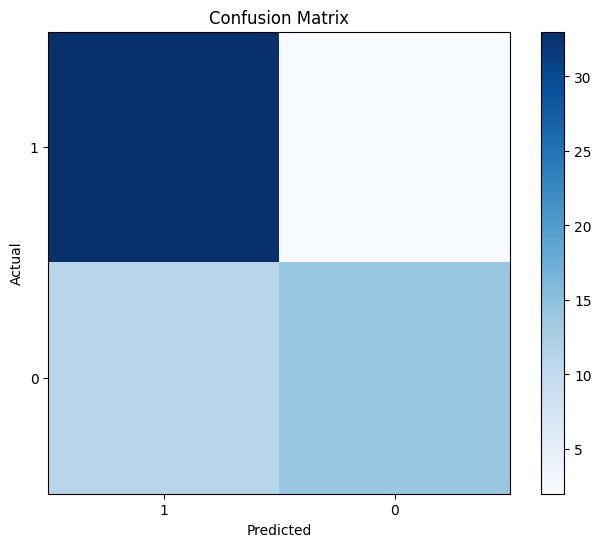

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Separate the features (X) and the target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
lr = LogisticRegression(max_iter=10000)

# Define hyperparameters for grid search
params = {'penalty': ['l1', 'l2'],
          'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Perform grid search with cross-validation
best_lr = GridSearchCV(lr, param_grid=params)
best_lr.fit(x_train, y_train)
print(f"Best parameters: {best_lr.best_params_}")

# Evaluate the model
s1 = best_lr.score(x_test, y_test)

print("Linear Regression Success Rate :", "{:.2f}%".format(100 * s1))

# Predict the test set
y_pred = best_lr.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

class_names = y.unique()
plot_confusion_matrix(cm, classes=class_names)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

Best parameters: {'C': 0.001, 'penalty': 'l2'}
Linear Regression Success Rate: 78.33%


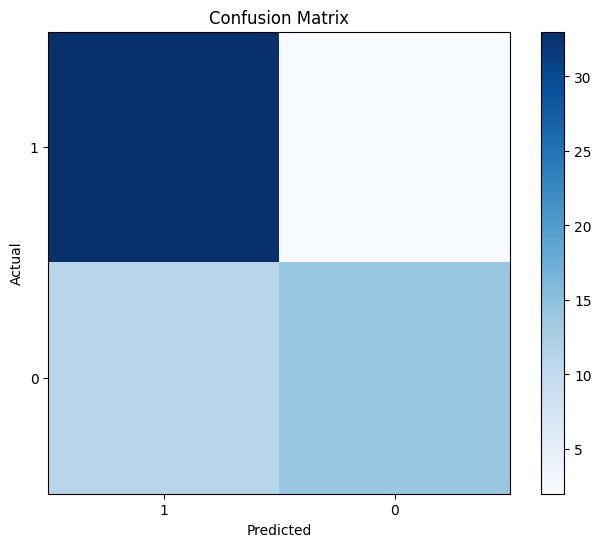

In [59]:
#Grid SearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt


# Separate the features (X) and the target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a logistic regression model
lr = LogisticRegression(max_iter=10000)

# Define hyperparameters for grid search
params = {'penalty': ['l1', 'l2'],
          'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}

# Search for best hyperparameters using GridSearchCV
best_lr = GridSearchCV(lr, param_grid=params, cv=5)  # You can adjust the number of cross-validation folds (cv) as needed
best_lr.fit(x_train, y_train)
print(f"Best parameters: {best_lr.best_params_}")

# Predict on the test set
p1 = best_lr.predict(x_test)
s1 = accuracy_score(y_test, p1)

print("Linear Regression Success Rate:", "{:.2f}%".format(100 * s1))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p1)

# Plot the confusion matrix
def plot_confusion_matrix(cm, classes):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

class_names = y.unique()
plot_confusion_matrix(cm, classes=class_names)


Random Forest Classifier Success Rate: 71.67%


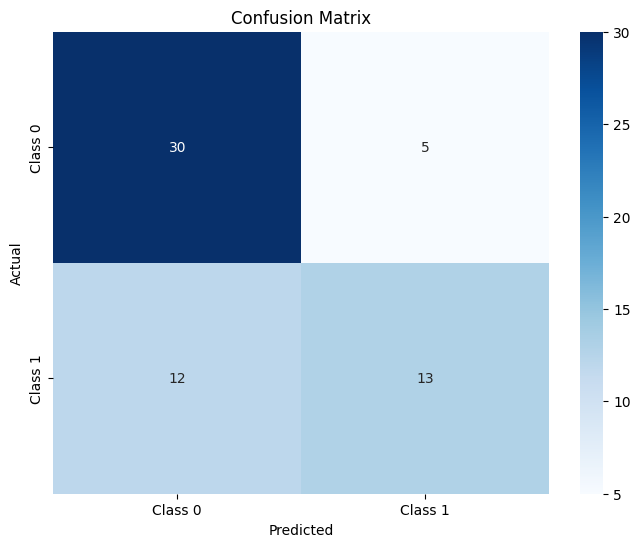

In [60]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier model
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

# Predict on the test set
p3 = rfc.predict(x_test)
s3 = accuracy_score(y_test, p3)

print("Random Forest Classifier Success Rate:", "{:.2f}%".format(100 * s3))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p3)

# Plot the confusion matrix with labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

K Nearest Neighbors Success Rate: 53.33%


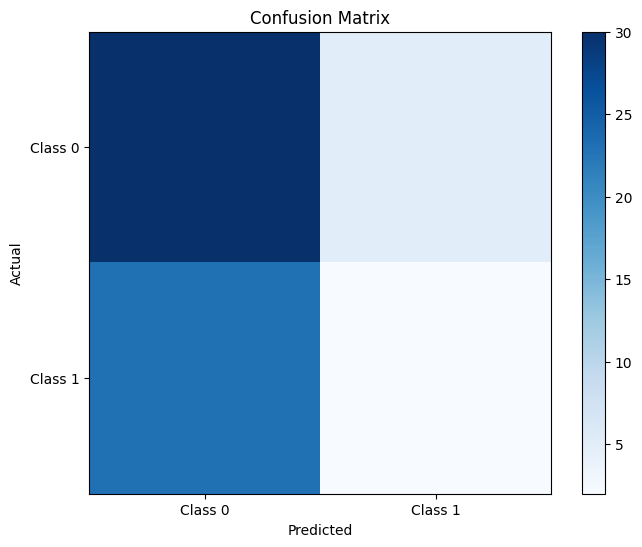

In [61]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns



# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a K Nearest Neighbors (KNN) model
knn = KNeighborsClassifier()

# Fit the model
knn.fit(x_train, y_train)

# Predict on the test set
p4 = knn.predict(x_test)
s4 = accuracy_score(y_test, p4)

print("K Nearest Neighbors Success Rate:", "{:.2f}%".format(100 * s4))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p4)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = [0, 1]  # Assuming binary classification
plt.xticks(tick_marks, ['Class 0', 'Class 1'])
plt.yticks(tick_marks, ['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Classifier Success Rate: 63.33%


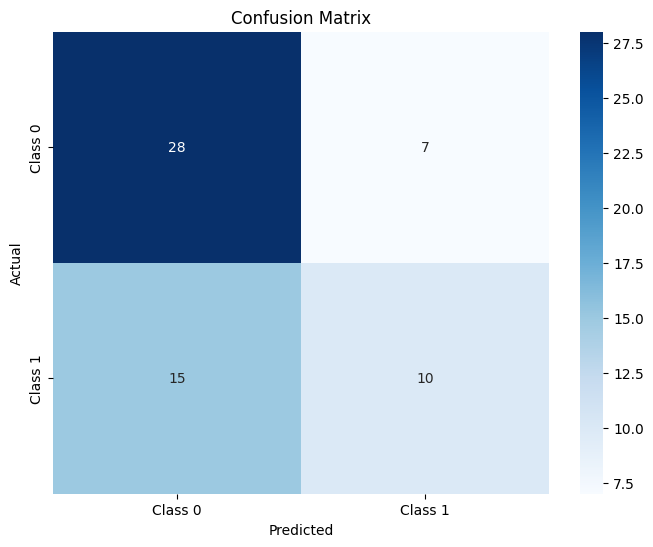

In [62]:
#DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Decision Tree Classifier model
classifier = DecisionTreeClassifier()

# Fit the model
classifier.fit(x_train, y_train)

# Predict on the test set
p5 = classifier.predict(x_test)
s5 = accuracy_score(y_test, p5)

print("Decision Tree Classifier Success Rate:", "{:.2f}%".format(100 * s5))

# Calculate the confusion matrix
cm = confusion_matrix(y_test, p5)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [63]:
!pip install bayesian-optimization


In [79]:
#Extra Gradient Booster Classifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV
import pandas as pd
# Split the data into training and testing sets with a consistent random_state
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameters for grid search
params = {
    'min_child_weight': [1, 5, 10],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

# Create an XGBoost Classifier model
xgb = XGBClassifier(learning_rate=0.01, n_estimators=1000, objective='binary:logistic', random_state=42)

# Initialize StratifiedKFold for cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Create a GridSearchCV object
grid = GridSearchCV(estimator=xgb, param_grid=params, n_jobs=4, cv=skf.split(x_train, y_train), verbose=0)

# Fit the model with early stopping and evaluation set
grid.fit(x_train, y_train, eval_metric="logloss", early_stopping_rounds=30, eval_set=[(x_test, y_test)])

# Get the best estimator from grid search
best_xgb = grid.best_estimator_

# Predict on the test set
p2x = best_xgb.predict(x_test)
s2x = accuracy_score(y_test, p2x)

print("XGBoost Classifier Success Rate:", "{:.2f}%".format(100 * s2x))

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:835: UserWarning:

`early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.



[0]	validation_0-logloss:0.69188
[1]	validation_0-logloss:0.69066
[2]	validation_0-logloss:0.68941
[3]	validation_0-logloss:0.68826
[4]	validation_0-logloss:0.68708
[5]	validation_0-logloss:0.68593
[6]	validation_0-logloss:0.68483
[7]	validation_0-logloss:0.68376
[8]	validation_0-logloss:0.68273
[9]	validation_0-logloss:0.68129
[10]	validation_0-logloss:0.68028
[11]	validation_0-logloss:0.67935
[12]	validation_0-logloss:0.67802
[13]	validation_0-logloss:0.67709
[14]	validation_0-logloss:0.67625
[15]	validation_0-logloss:0.67538
[16]	validation_0-logloss:0.67454
[17]	validation_0-logloss:0.67378
[18]	validation_0-logloss:0.67298
[19]	validation_0-logloss:0.67181
[20]	validation_0-logloss:0.67107
[21]	validation_0-logloss:0.67036
[22]	validation_0-logloss:0.66973
[23]	validation_0-logloss:0.66902
[24]	validation_0-logloss:0.66843
[25]	validation_0-logloss:0.66786
[26]	validation_0-logloss:0.66722
[27]	validation_0-logloss:0.66660
[28]	validation_0-logloss:0.66600
[29]	validation_0-loglos

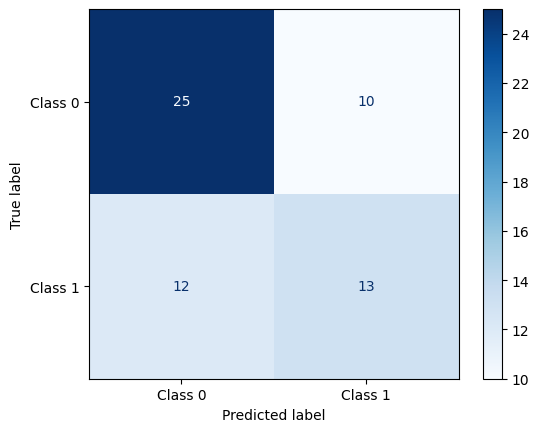

In [82]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Assuming you have the best model stored in grid.best_estimator_ from the previous code
# grid.best_estimator_ represents the best model found during grid search

# Generate predictions
y_pred = grid.best_estimator_.predict(x_test)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix with labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Class 0", "Class 1"])
disp.plot(cmap="Blues")
plt.show()


In [83]:
print(f'Gradient Booster Classifier: {round(100*s2, 2)}%\nDecision Tree Classifier: {round(sorted(list1, reverse=True)[0], 2)}%\nLogistic Regression: {round(100*s1, 2)}%\nSupport Vector Machine: {round(100*s4, 2)}%\nRandom Forest Classifier: {round(100*s3, 2)}%\nK Nearest Neighbors: {round(sorted(scorelist,reverse=True)[0], 2)}%\nExtra Gradient Booster Classifier: {round(100*s2x, 2)}%')

Gradient Booster Classifier: 85.0%
Decision Tree Classifier: 75.0%
Logistic Regression: 78.33%
Support Vector Machine: 53.33%
Random Forest Classifier: 71.67%
K Nearest Neighbors: 58.33%
Extra Gradient Booster Classifier: 63.33%


Summary Statistics:
              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.00

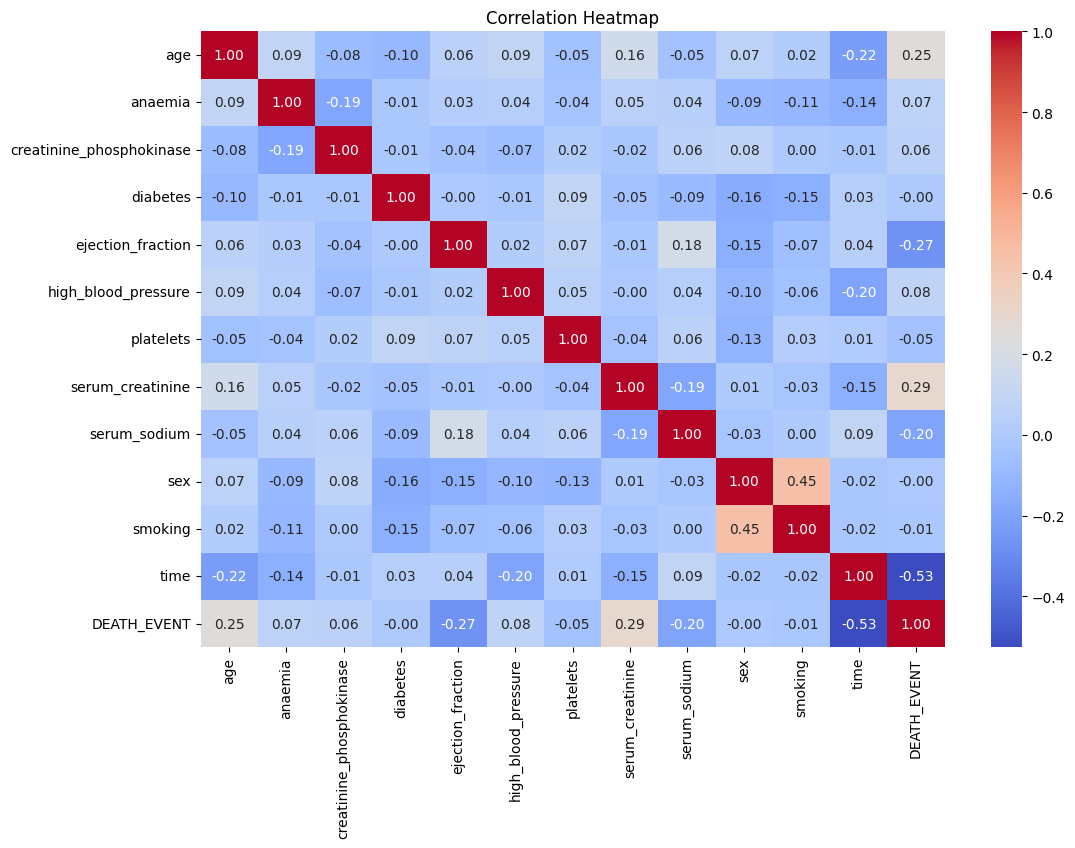

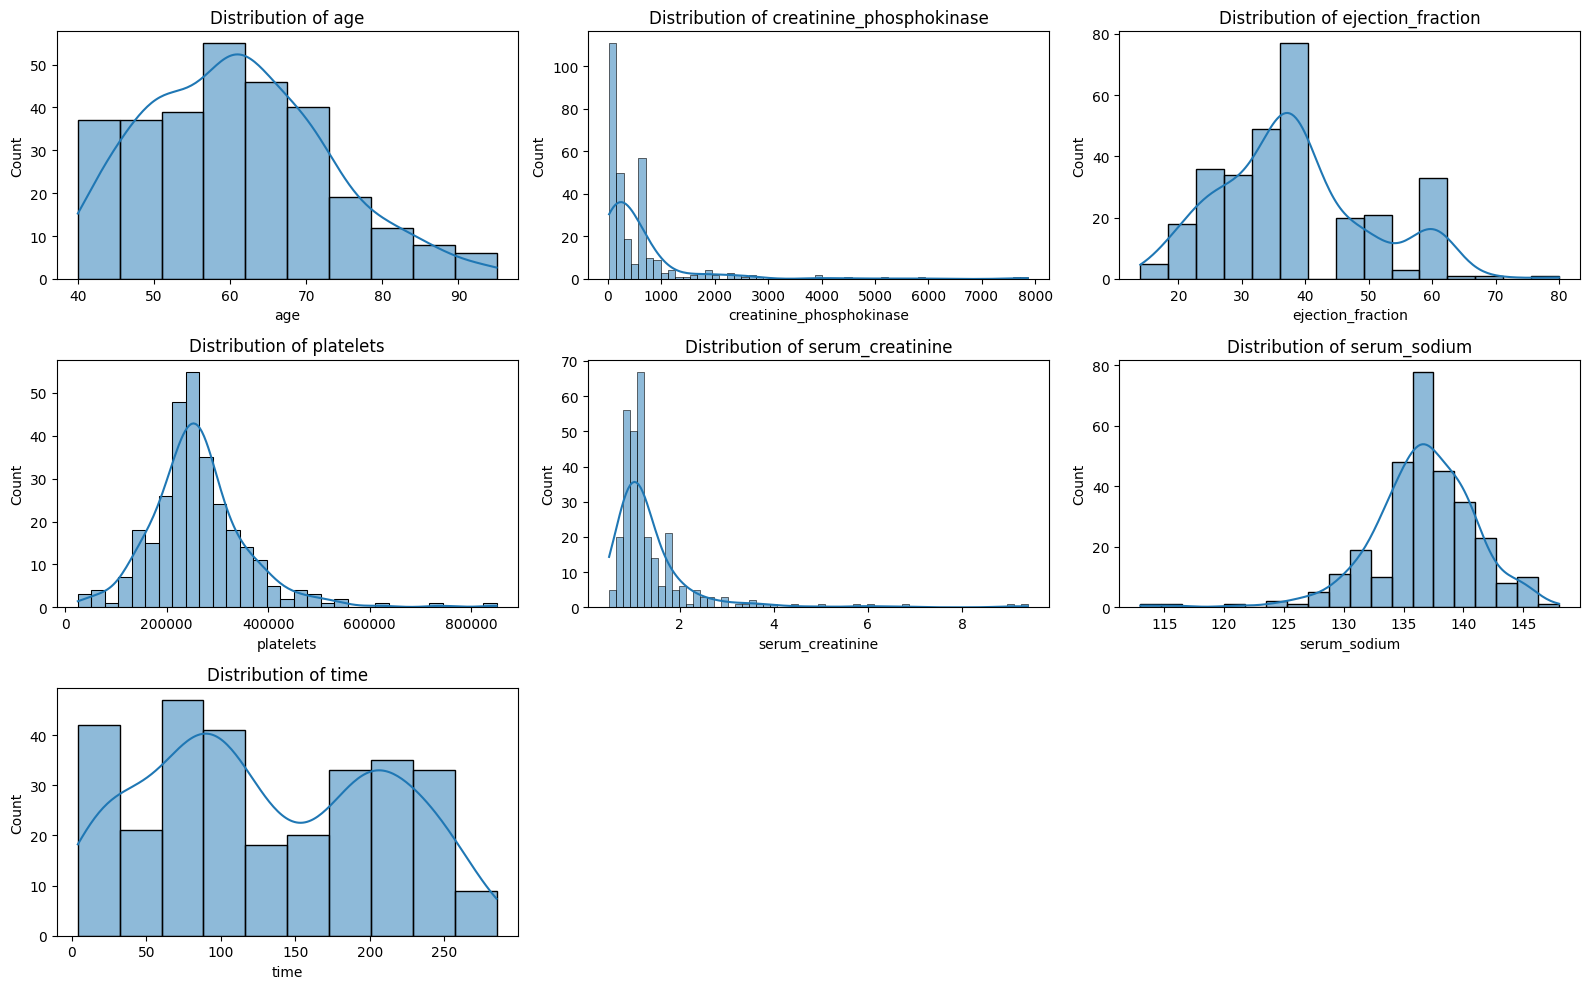

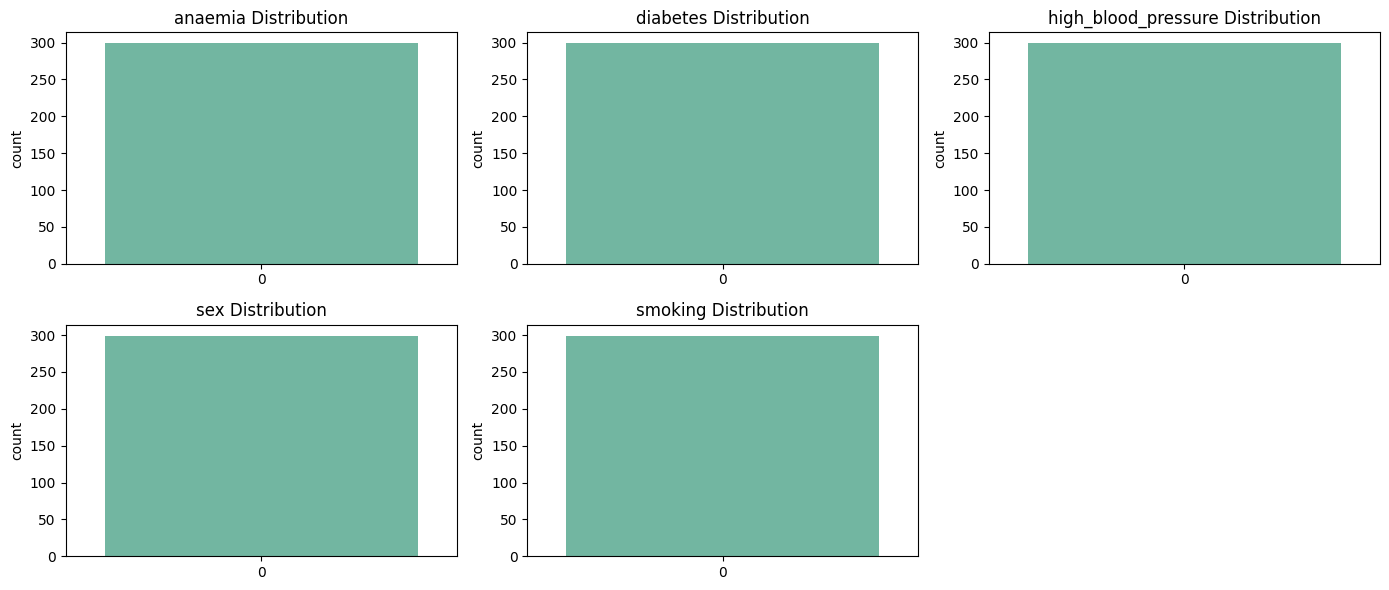

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Display basic statistics about the dataset
print("Summary Statistics:")
print(data.describe())

# Check for missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Explore the distribution of the target variable
print("\nDistribution of DEATH_EVENT:")
print(data['DEATH_EVENT'].value_counts())

# Visualize correlations between features
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

# Explore the distribution of numerical features
numerical_features = ['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets', 'serum_creatinine', 'serum_sodium', 'time']

plt.figure(figsize=(16, 10))
for i, feature in enumerate(numerical_features, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribution of {feature}')
plt.tight_layout()
plt.show()

# Explore categorical features
categorical_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking']

plt.figure(figsize=(14, 6))
for i, feature in enumerate(categorical_features, 1):
    plt.subplot(2, 3, i)
    sns.countplot(data[feature], palette='Set2')
    plt.title(f'{feature} Distribution')
plt.tight_layout()
plt.show()


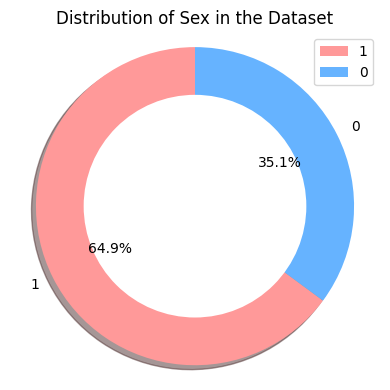

In [77]:
# Group the data by 'sex' and count the occurrences of each category
sex_counts = data['sex'].value_counts()

# Create a custom color palette for the pie chart slices
colors = ['#ff9999', '#66b3ff']

# Create the pie chart
plt.figure(figsize=(4, 4))
plt.pie(sex_counts, labels=sex_counts.index, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True)

# Add a central circle to make it look like a donut chart
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Add a title and legend
plt.title("Distribution of Sex in the Dataset")
plt.legend(labels=sex_counts.index, loc='upper right')

# Equal aspect ratio ensures that pie is drawn as a circle.
plt.axis('equal')

# Show the pie chart
plt.tight_layout()
plt.show()

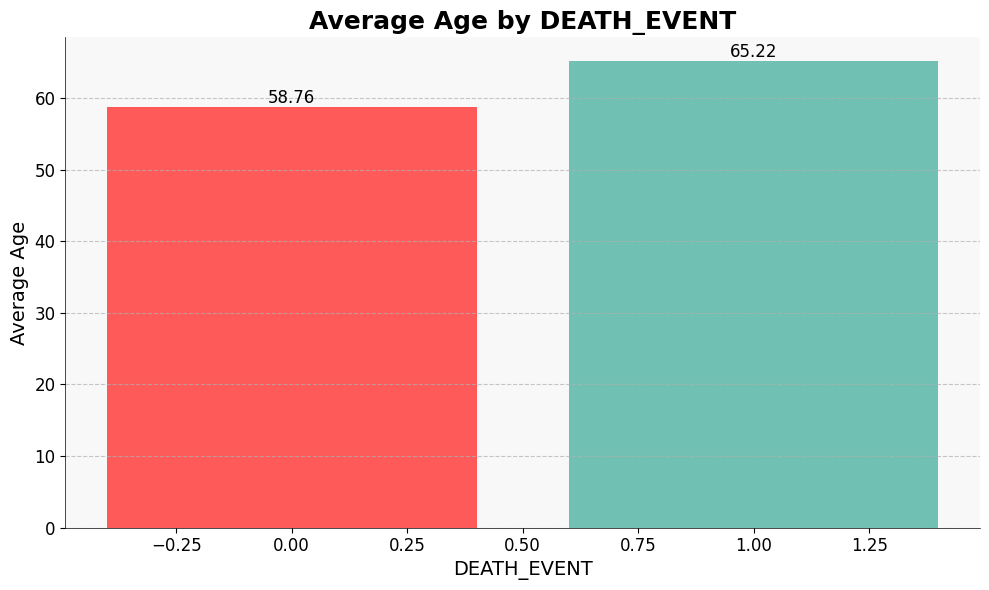

In [66]:
age_by_death_event = data.groupby('DEATH_EVENT')['age'].mean()


colors = ['#FF5A5A', '#70C1B3']


plt.figure(figsize=(10, 6))
ax = plt.bar(age_by_death_event.index, age_by_death_event, color=colors)


for i, bar in enumerate(ax):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{age_by_death_event[i]:.2f}', ha='center', va='bottom', fontsize=12)


plt.title('Average Age by DEATH_EVENT', fontsize=18, fontweight='bold')
plt.xlabel('DEATH_EVENT', fontsize=14)
plt.ylabel('Average Age', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()

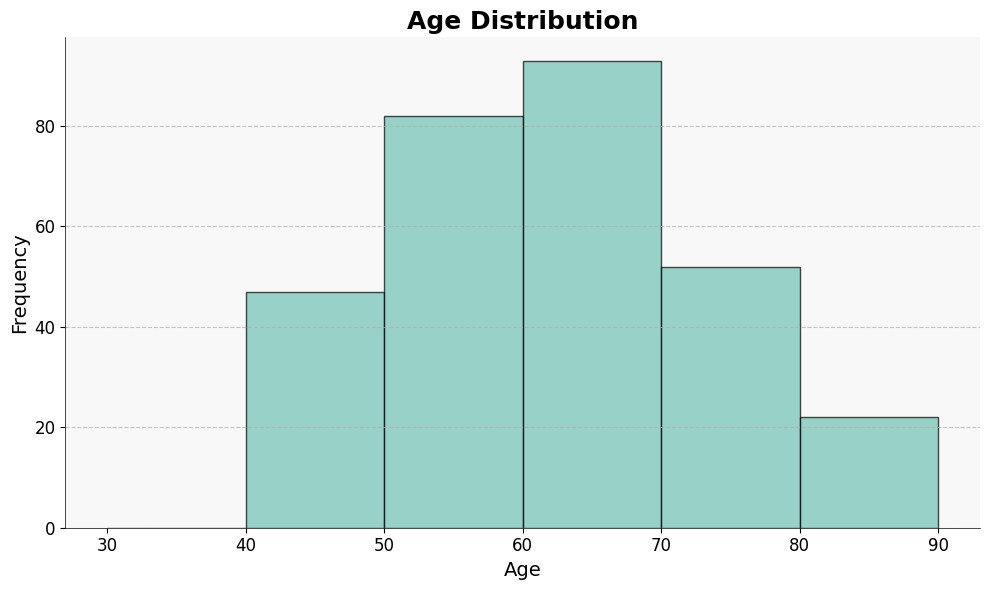

In [67]:
age_data = data['age']


plt.figure(figsize=(10, 6))


bins = [30, 40, 50, 60, 70, 80, 90]


plt.hist(age_data, bins=bins, edgecolor='black', color='#70C1B3', alpha=0.7)

plt.title('Age Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)


plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#F8F8F8')


# Remove unnecessary spines and set the layout
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['left'].set_linewidth(0.5)
plt.gca().spines['bottom'].set_linewidth(0.5)
plt.tight_layout()


plt.show()

In [68]:
from sklearn.feature_selection import SelectKBest, chi2



# Split the data into features (X) and target variable (y)
X = data.drop('DEATH_EVENT', axis=1)
y = data['DEATH_EVENT']

# Create a SelectKBest object with chi2 scoring function (k is the number of features to select)
k_best = SelectKBest(score_func=chi2, k=5)


# Fit the SelectKBest object on the data and transform it to get the selected features
X_k_best = k_best.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = k_best.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)

Selected Features:
Index(['age', 'creatinine_phosphokinase', 'ejection_fraction', 'platelets',
       'time'],
      dtype='object')


In [69]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.1, random_state=1)

In [70]:
from sklearn.linear_model import LogisticRegression

# Create an instance of Support Vector Machine Classifier
my_model = LogisticRegression()
my_model.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [71]:
my_model.score(X_test, y_test)

0.8666666666666667

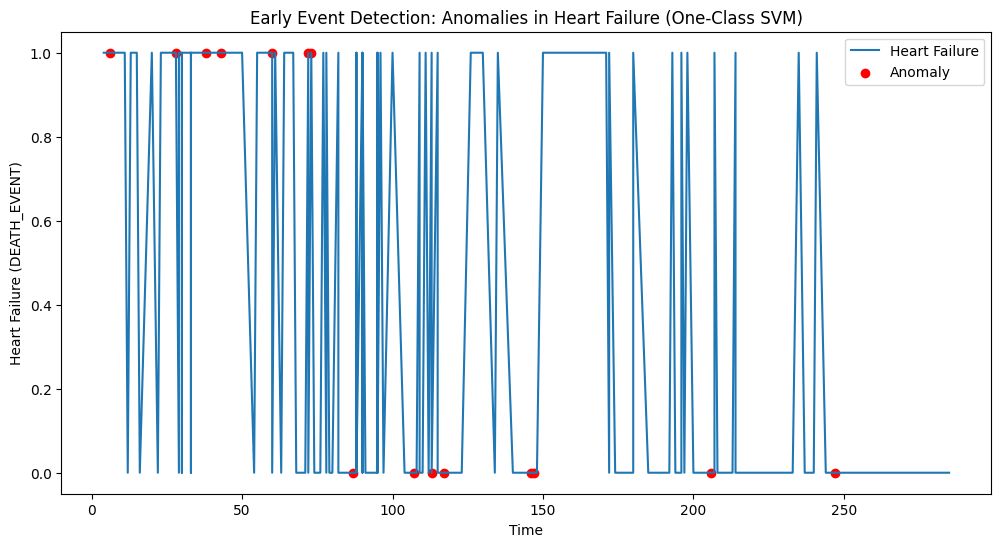

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
31   85.0        0                        23         0                 45   
46   51.0        0                      1380         0                 25   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
72   85.0        0                      5882         0                 35   
75   60.0        1                        47         0                 20   
103  42.0        0                      5209         0                 30   
134  81.0        0                      4540         0                 35   
147  64.0        0                      1610         0                 60   
151  62.0        0                        30         1                 60   
171  52.0        0                      3966         0                 40   

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Assuming the 'time' column represents time steps, sort the data by time
data.sort_values(by='time', inplace=True)

# Select relevant features for anomaly detection
features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

# Create a feature matrix
X = data[features].values

# Fit a One-Class SVM model for anomaly detection
model = OneClassSVM(nu=0.05)  # Adjust the nu parameter as needed
model.fit(X)

# Predict anomalies (early event detection)
anomalies = model.predict(X)

# Add the anomaly predictions to the dataset
data['anomaly'] = anomalies

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['DEATH_EVENT'], label='Heart Failure')
plt.scatter(data[data['anomaly'] == -1]['time'], data[data['anomaly'] == -1]['DEATH_EVENT'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Heart Failure (DEATH_EVENT)')
plt.legend()
plt.title('Early Event Detection: Anomalies in Heart Failure (One-Class SVM)')
plt.show()

# Identify and further analyze the anomalies
early_event_anomalies = data[data['anomaly'] == -1]

# Print or analyze early event anomalies as needed
print(early_event_anomalies)



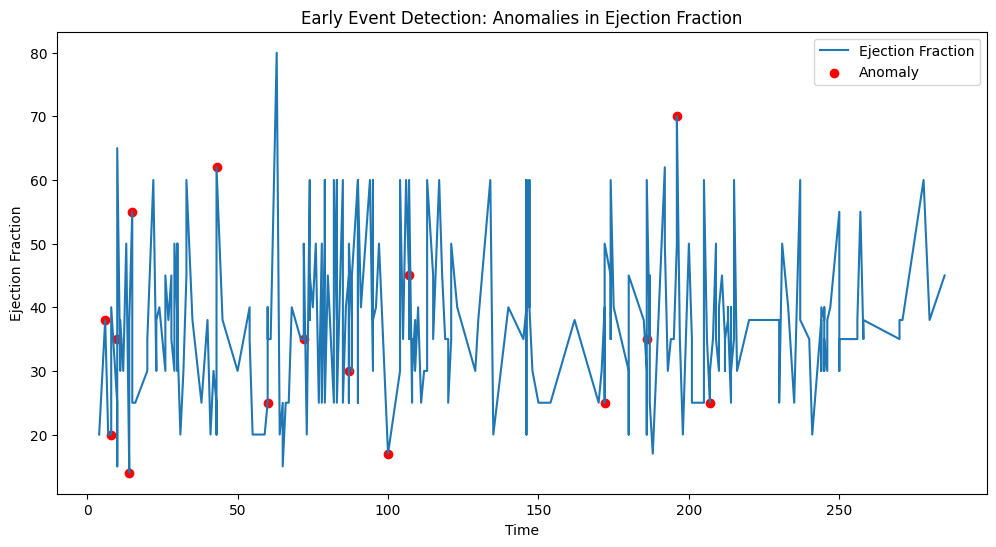

      age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
1    55.0        0                      7861         0                 38   
4    65.0        1                       160         1                 20   
9    80.0        1                       123         0                 35   
17   45.0        0                       582         0                 14   
19   48.0        1                       582         1                 55   
52   60.0        0                      3964         1                 62   
60   45.0        0                      7702         1                 25   
72   85.0        0                      5882         0                 35   
103  42.0        0                      5209         0                 30   
126  46.0        0                       168         1                 17   
131  60.0        1                      1082         1                 45   
187  60.0        0                      1896         1                 25   

In [73]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Assuming the 'time' column represents time steps, sort the data by time
data.sort_values(by='time', inplace=True)

# Select relevant features for anomaly detection
features = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_creatinine', 'serum_sodium']

# Create a feature matrix
X = data[features].values

# Fit an Isolation Forest model for anomaly detection
model = IsolationForest( contamination=0.05, random_state=42)
model.fit(X)

# Predict anomalies (early event detection)
anomalies = model.predict(X)

# Add the anomaly predictions to the dataset
data['anomaly'] = anomalies

# Visualize the anomalies
plt.figure(figsize=(12, 6))
plt.plot(data['time'], data['ejection_fraction'], label='Ejection Fraction')
plt.scatter(data[data['anomaly'] == -1]['time'], data[data['anomaly'] == -1]['ejection_fraction'], color='red', label='Anomaly')
plt.xlabel('Time')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.title('Early Event Detection: Anomalies in Ejection Fraction')
plt.show()

# Identify and further analyze the anomalies
early_event_anomalies = data[data['anomaly'] == -1]

# Print or analyze early event anomalies as needed
print(early_event_anomalies)


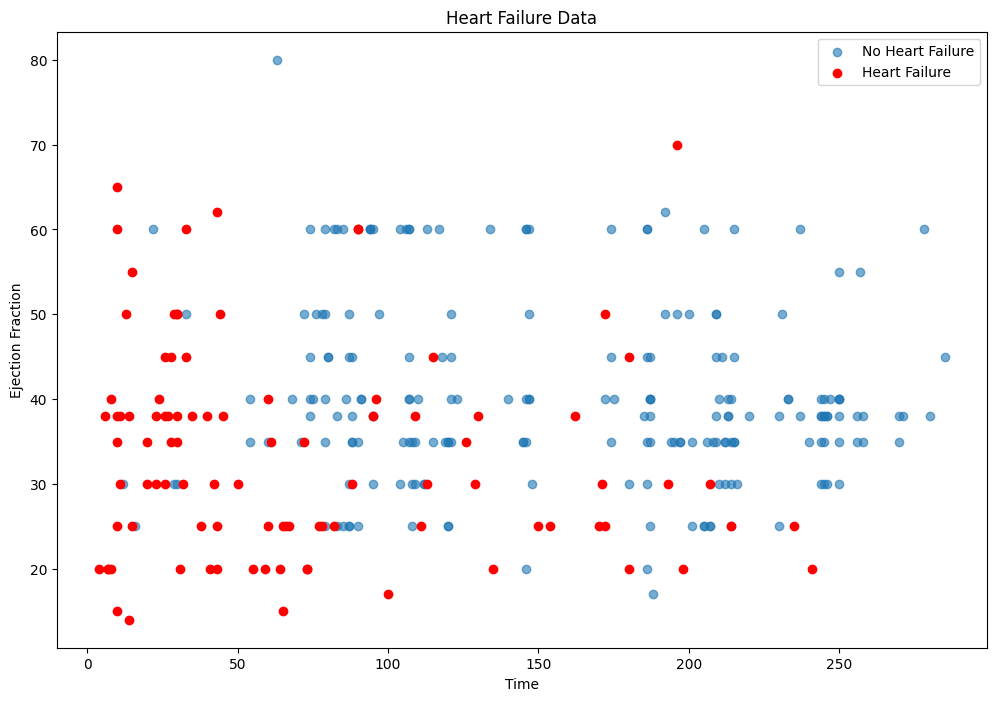

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Separate the data into two groups: heart failure and no heart failure
heart_failure = data[data['DEATH_EVENT'] == 1]
no_heart_failure = data[data['DEATH_EVENT'] == 0]

# Plot the data points, marking heart failure cases in red
plt.figure(figsize=(12, 8))
plt.scatter(no_heart_failure['time'], no_heart_failure['ejection_fraction'], label='No Heart Failure', alpha=0.6)
plt.scatter(heart_failure['time'], heart_failure['ejection_fraction'], label='Heart Failure', color='red')
plt.xlabel('Time')
plt.ylabel('Ejection Fraction')
plt.legend()
plt.title('Heart Failure Data')
plt.show()


In [75]:
pip install plotly


In [76]:
import pandas as pd
import plotly.express as px

# Load the dataset
data = pd.read_csv("heart_failure_clinical_records_dataset.csv")

# Create a scatter plot using Plotly Express
fig = px.scatter(data, x="time", y="ejection_fraction", color="DEATH_EVENT",
                 labels={"time": "Time", "ejection_fraction": "Ejection Fraction"},
                 title="Heart Failure Data")

# Customize the color scale
fig.update_traces(marker=dict(size=8),
                  selector=dict(mode='markers'))

# Set colors for heart failure and no heart failure
fig.update_traces(marker=dict(color='red'), selector=dict(marker=dict(color=1)))

# Show the plot
fig.show()
